# Assignment 2 - Machine Learning Basics

## *Zhuangdie Alan Zhou*
Netid:  *zz161*

Github link: *https://github.com/zz161/ECE590-assignment0*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1 Better. If the number of predictors is small, a flexible method can fit the data better and will not decrease interpretablitiy of the model too much. Also, the sample size is extremely large so that there is less possiblity for the flexible method to overfit the data.


2 Worse. If the number of predictiors is extremely large, using a flexible method can make it extremely hard to interpret the model. And with a small number of observation a flexible method might easily overfit the data.


3 Better. A linear model is a relatively inflexible model, if the relationship between the predictors and the response is highyly non-linear, a non-linear model, which is a more flexible model, would fit better than an inflexible method.


4 Worse. If variance of error term is extremely high, a flexible method will result in high variance and overfitting. Therefore an inflexible method woule be better.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a)  Regression problem. Inference is of most interest. Sample size $n = 500$, number of predictors $p = 3$.

(b)  Classification problem. Prediction is of most interest. Sample size $n = 20$, number of predictors $p = 13$.

(c)  Regression problem. Prediction is of most interest. Sample size $n = 52$, number of predictors $p = 3$.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

(a)

In [1]:
import pandas as pd
import numpy as np
import time
# (a) Write your own kNN classifier

class Knn:
    
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    def fit(self, x, y):
        self.trainx = x
        self.trainy = y
        # Save the training data to properties of this class
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        self.testx = x
        for test in np.array(self.testx):
            distance = list()
            for i in range(0,len(self.trainx)):
                dis = np.array(test) - np.array(self.trainx)[i,:]
                distance.append((np.dot(dis,dis),np.array(self.trainy)[i,0]))
            knns = sorted(distance,key = lambda x : x[0])[0:k]
            y = [x[1] for x in knns]
            if sum(y)/len(y)<0.5:
                y_prepoint = 0
            else:
                y_prepoint = 1
            y_hat.append(y_prepoint)
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(1 for a,b in zip(y,y_hat) if a == b)/ nvalues
    return accuracy

(b)

In [2]:
trainlowx = pd.read_csv('data/A2_X_train_low.csv',names=['x1','x2'])
trainlowy = pd.read_csv('data/A2_y_train_low.csv',names='y')
testlowx = pd.read_csv('data/A2_X_test_low.csv',names=['x1','x2'])

trainhighx = pd.read_csv('data/A2_X_train_high.csv',header = None)
trainhighy = pd.read_csv('data/A2_y_train_high.csv',header = None)
testhighx = pd.read_csv('data/A2_X_test_high.csv',header = None)

(c)

In [3]:
tlow = Knn()
tlow.fit(trainlowx,trainlowy)
time_start1 = time.clock()
y_hatlow = tlow.predict(testlowx,5)
time_elapsed1 = (time.clock() - time_start1)

In [4]:
testlowy = pd.read_csv('data/A2_y_test_low.csv',names=['y'],dtype = int)
ylow = testlowy['y'].tolist()
accuracy(ylow,y_hatlow)

0.925

In [5]:
thigh = Knn()
thigh.fit(trainhighx,trainhighy)
time_start2 = time.clock()
y_hathigh = thigh.predict(testhighx,5)
time_elapsed2 = (time.clock() - time_start2)

In [6]:
testhighy = pd.read_csv('data/A2_y_test_high.csv',names=['y'],dtype = int)
yhigh = testhighy['y'].tolist()
accuracy(yhigh,y_hathigh)

0.993

(d)

In [7]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each


In [10]:
import sklearn
import sklearn.neighbors as nb
slow = nb.KNeighborsClassifier(n_neighbors=5)
strainlow = slow.fit(np.array(trainlowx),np.array(trainlowy).ravel())
time_start3 = time.clock()
strainlowy = strainlow.predict(testlowx)
time_elapsed3 = (time.clock() - time_start3)
strainaccu1 = sklearn.metrics.accuracy_score(strainlowy, testlowy)
strainaccu1

0.925

In [11]:
shigh = nb.KNeighborsClassifier(n_neighbors=5)
strainhigh = shigh.fit(np.array(trainhighx),np.array(trainhighy).ravel())
time_start4 = time.clock()
strainhighy = strainhigh.predict(testhighx)
time_elapsed4 = (time.clock() - time_start4)
strainaccu2 = sklearn.metrics.accuracy_score(strainhighy, testhighy)
strainaccu2

0.993

In [12]:
print('Time [sec] (low dimension with my method): {:.3f}'.format(time_elapsed1))
print('Accuracy of low dimension with my method): {:.3f}'.format(accuracy(ylow,y_hatlow)))
print('')
print('Time [sec] (low dimension with KNeighborsClassifier): {:.3f}'.format(time_elapsed3))
print('Accuracy of low dimension with my method): {:.3f}'.format(strainaccu1))
print('')
print('KNeighborsClassifier is {:.1f} times faster than my method in low dimension'.format(time_elapsed1/time_elapsed3))
print('Accuracy of KNeighborsClassifier and my method are the same in low dimension')

Time [sec] (low dimension with my method): 53.947
Accuracy of low dimension with my method): 0.925

Time [sec] (low dimension with KNeighborsClassifier): 0.004
Accuracy of low dimension with my method): 0.925

KNeighborsClassifier is 13090.8 times faster than my method in low dimension
Accuracy of KNeighborsClassifier and my method are the same in low dimension


In [13]:
print('Time [sec] (high dimension with my method): {:.3f}'.format(time_elapsed2))
print('Accuracy of high dimension with my method): {:.3f}'.format(accuracy(yhigh,y_hathigh)))
print('')
print('Time [sec] (high dimension with KNeighborsClassifier): {:.3f}'.format(time_elapsed4))
print('Accuracy of high dimension with my method): {:.3f}'.format(strainaccu2))
print('')
print('KNeighborsClassifier is {:.1f} times faster than my method in high dimension'.format(time_elapsed2/time_elapsed4))
print('Accuracy of KNeighborsClassifier and my method are the same in low dimension')

Time [sec] (high dimension with my method): 136.501
Accuracy of high dimension with my method): 0.993

Time [sec] (high dimension with KNeighborsClassifier): 0.233
Accuracy of high dimension with my method): 0.993

KNeighborsClassifier is 586.4 times faster than my method in high dimension
Accuracy of KNeighborsClassifier and my method are the same in low dimension


(e)

When data volumn is huge, slow predict process consumes too much time, this can be problematic especially when we are dealing with a high dimension dataset and time is critical.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [14]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

(a)

In [15]:
import pandas as pd
distance = pd.DataFrame(columns=['x1','x2','x3'],data=X,index=[1,2,3,4,5,6])
distance['Euclidean distance']=[sum(np.square(x)) for x in X]
distance

,x1,x2,x3,Euclidean distance
1,0,3,0,9
2,2,0,0,4
3,0,1,3,10
4,0,1,2,5
5,-1,0,1,2
6,1,1,1,3


(b) Blue. When $K = 1$, we look at the most nearest observation to $K$ which is observation 5. As observation 5 belongs to Blue so our prediction is Blue when $K = 1$.

(c) Red. When $K = 3$, we look at the three nearest observations to $K$ which are observation 2, 5, 6. As obervation 2, 6 belong to Red and observation 5 belong to Blue, our prediction is Red when $K = 3$.

(d) Small. As Bayes decision boundary is highly nonlinear, we need a flexible method to fit the data better. Therefore we need a small $K$ here for a flexible model.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

(a)

In [16]:
import numpy as np
import sklearn.datasets
np.random.seed(409)
sample = sklearn.datasets.make_moons(n_samples=1000, noise=0.35)
dataset = pd.DataFrame(columns = ['x1','x2'],data = sample[0])
dataset['y']=sample[1]
dataset.head()

,x1,x2,y
0,-0.112841,0.314504,1
1,-1.130830,0.357147,0
2,1.472876,0.261512,0
3,-1.146040,1.023232,0
4,-0.074225,0.743341,0


(b)

Text(0.5, 1.0, 'Scatterplot of two classed')

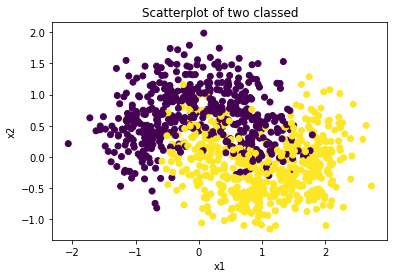

In [60]:
import matplotlib.pyplot as plt
plt.scatter(data=dataset,x='x1',y='x2',c='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of two classed')

(c)

In [18]:
import sklearn.neighbors as nb
#data subset1
np.random.seed(12)
s1 = pd.DataFrame.sample(dataset,n=100)
s1x = s1[['x1','x2']].values
s1y = s1['y'].values
s1k1 = nb.KNeighborsClassifier(n_neighbors=1)
s1k1p = s1k1.fit(s1x,s1y)

s1k25 = nb.KNeighborsClassifier(n_neighbors=25)
s1k25.fit(s1x,s1y)

s1k50 = nb.KNeighborsClassifier(n_neighbors=50)
s1k50.fit(s1x,s1y)

#data subset2
np.random.seed(123)
s2 = pd.DataFrame.sample(dataset,n=100)
s2x = s2[['x1','x2']].values
s2y = s2['y'].values
s2k1 = nb.KNeighborsClassifier(n_neighbors=1)
s2k1.fit(s2x,s2y)

s2k25 = nb.KNeighborsClassifier(n_neighbors=25)
s2k25.fit(s2x,s2y)

s2k50 = nb.KNeighborsClassifier(n_neighbors=50)
s2k50.fit(s2x,s2y)

#data subset3
np.random.seed(1234)
s3 = pd.DataFrame.sample(dataset,n=100)
s3x = s3[['x1','x2']].values
s3y = s3['y'].values
s3k1 = nb.KNeighborsClassifier(n_neighbors=1)
s3k1.fit(s3x,s3y)

s3k25 = nb.KNeighborsClassifier(n_neighbors=25)
s3k25.fit(s3x,s3y)

s3k50 = nb.KNeighborsClassifier(n_neighbors=50)
s3k50.fit(s3x,s3y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

(d)

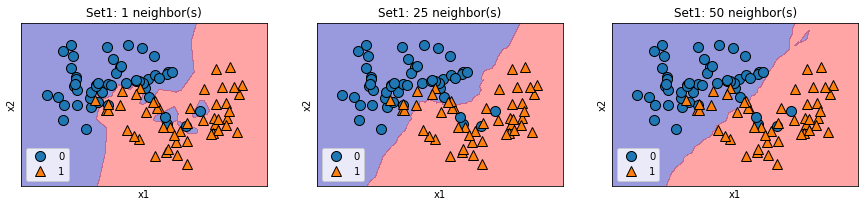

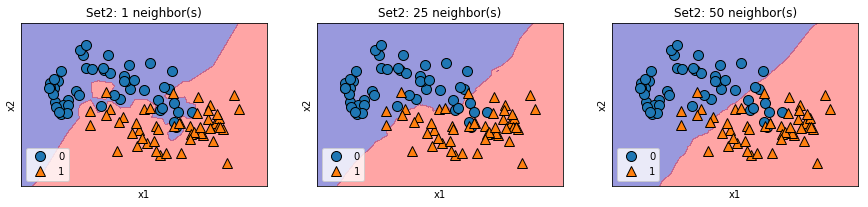

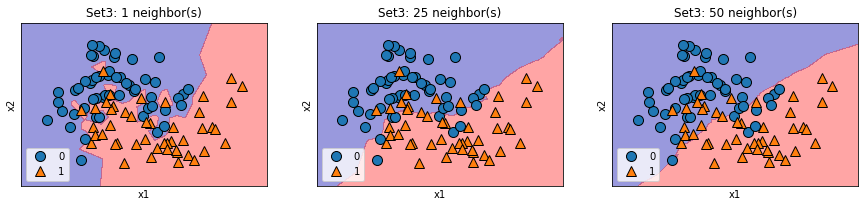

In [19]:
import mglearn
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 25, 50], axes):
    clf = nb.KNeighborsClassifier(n_neighbors=n_neighbors).fit(s1x, s1y)
    mglearn.plots.plot_2d_separator(clf, s1x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(s1x[:, 0], s1x[:, 1], s1y, ax=ax)
    ax.set_title("Set1: {} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
axes[0].legend(loc=3)
axes[1].legend(loc=3)
axes[2].legend(loc=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 25, 50], axes):
    clf = nb.KNeighborsClassifier(n_neighbors=n_neighbors).fit(s2x, s2y)
    mglearn.plots.plot_2d_separator(clf, s2x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(s2x[:, 0], s2x[:, 1], s2y, ax=ax)
    ax.set_title("Set2: {} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
axes[0].legend(loc=3)
axes[1].legend(loc=3)
axes[2].legend(loc=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 25, 50], axes):
    clf = nb.KNeighborsClassifier(n_neighbors=n_neighbors).fit(s3x, s3y)
    mglearn.plots.plot_2d_separator(clf, s3x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(s3x[:, 0], s3x[:, 1], s3y, ax=ax)
    ax.set_title("Set3: {} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
axes[0].legend(loc=3)
axes[1].legend(loc=3)
axes[2].legend(loc=3)

(e)

Between columns I can find that as number of neighbors goes up, the model tends to under fit the data because higher bias and is less flexible. Between rows there are not significant different since all three subsets are randomly chosen from the dataset.

Decision boundaries when $K=1$ appear to best separate the two classes of data. Again decision boundaries when $K=1$ vary the most as the data change.

(f)

If we look at the first line that represents the first dataset, as number of neighbors $K$ goes up, bias increase and model tends to underfit the data while variance and flexibility decrease. As number of of neighbors $K$ goes down, variance and flexibility increases and model tends to overfit the data while bias decreases. So there is a trade-off between variance and bias.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

(a)

In [20]:
np.random.seed(409)
sample1 = sklearn.datasets.make_moons(n_samples=1000, noise=0.35)
np.random.seed(730)
sample2 = sklearn.datasets.make_moons(n_samples=1000, noise=0.35)
training = pd.DataFrame(columns = ['x1','x2'],data = sample1[0])
training['y']=sample1[1]
test = pd.DataFrame(columns = ['x1','x2'],data = sample2[0])
test['y']=sample2[1]
print(training.head())
print(test.head())

         x1        x2  y
0 -0.112841  0.314504  1
1 -1.130830  0.357147  0
2  1.472876  0.261512  0
3 -1.146040  1.023232  0
4 -0.074225  0.743341  0
         x1        x2  y
0  0.293031  1.422360  0
1  1.711255  0.103953  1
2  0.972804 -0.613358  1
3 -0.497458  0.320469  1
4  0.742680  0.535572  0


(b)

In [21]:
from sklearn import metrics
trainx = training[['x1','x2']].values
trainy = training['y'].values
testx = test[['x1','x2']].values
testy = test['y'].values
error1 = []
error2 = []
for k in range(1,501):
    clft = nb.KNeighborsClassifier(n_neighbors=k)
    clft.fit(trainx,trainy)
    y_pred = clft.predict(trainx)
    y_pred2 = clft.predict(testx)
    error1.append(1-sklearn.metrics.accuracy_score(trainy, y_pred))
    error2.append(1-sklearn.metrics.accuracy_score(testy, y_pred2))
    

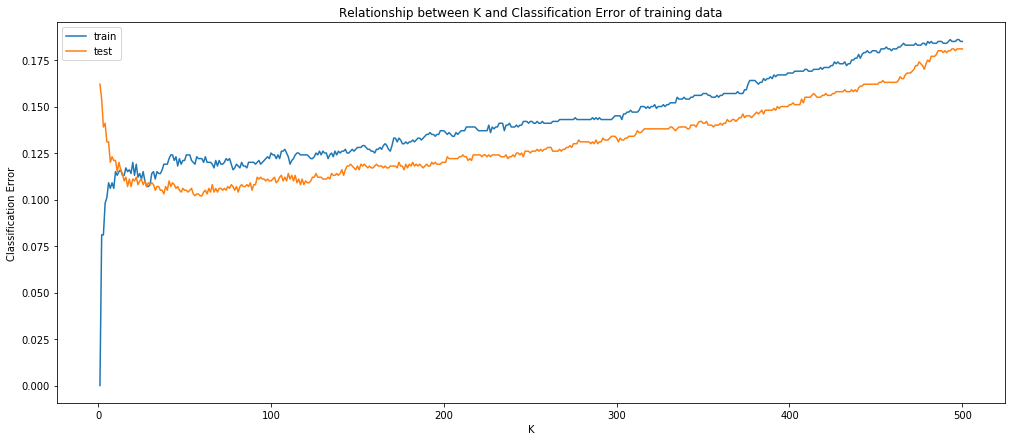

In [22]:
plt.figure(figsize=(17,7))
plt.plot(range(1,501),error1,label = 'train')
plt.plot(range(1,501),error2,label = 'test')
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.title('Relationship between K and Classification Error of training data')
plt.legend()

(c)

When $K$ increase from 1 to 500, the classification error of training dataset first goes up sharply and then smoothly increases starting from k around 15. While the classification error of testing dataset drop sharply at first and then smoothly increases starting from k around 50.

(d)

Larger values of $K$ represent high bias and smaller values of $K$ represent high variance.

(e)

In [32]:
for i, j in zip(error1,error2):
    if i == j:
        print(error1.index(i))

12
24
26
27
29


The optimal $K$ is 12 since when $K = 12$, the training data and test data has the same low classification error. So the model is not overfitting and the test error is relatively low.

(f)

For other models, degrees of freedom control the flexibility, which is related to the number of parameters.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [42]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

(a)

Text(0.5, 1.0, 'Training Data')

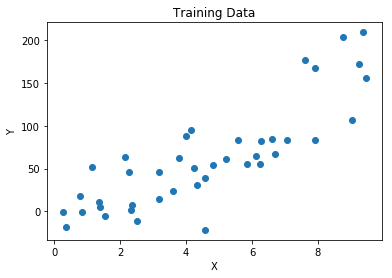

In [43]:
plt.scatter(x = x_train, y = y_train)
plt.xlabel('X') 
plt.ylabel('Y')
plt.title('Training Data')

(b)

In [44]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
regr = lm.LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = regr.predict(np.array(x_train).reshape(-1,1))
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred))
print('R square: %.2f' % r2_score(y_train,y_pred))
print('Equation: y = {:.2f} + {:.2f} x'.format(float(regr.intercept_),float(regr.coef_)))

Mean squared error: 1052.59
R square: 0.70
Equation: y = -21.73 + 18.30 x


(c)

In [45]:
xtrain2 = []
for i in x_train:
    xtrain2.append(i**2)   
regr1 = lm.LinearRegression()
X = np.c_[np.array(x_train).reshape(-1,1),np.array(xtrain2).reshape(-1,1)]
regr1.fit(X,np.array(y_train).reshape(-1,1))
y_pred1 = regr1.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred1))
print('R square: %.2f' % r2_score(y_train,y_pred1))
print('Equation: y = {:.2f} + {:.2f} x + {:.2f}x**2'.format(float(regr1.intercept_),float(regr1.coef_[0,0]),float(regr1.coef_[0,1])))

Mean squared error: 884.80
R square: 0.75
Equation: y = 8.01 + 0.47 x + 1.83x**2


(d)

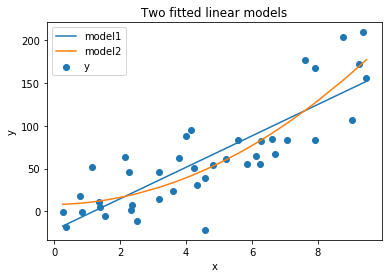

In [46]:
import matplotlib.lines as lines
#plot both functions
sortx = sorted(x_train)
d = np.column_stack((x_train,y_train))
df = pd.DataFrame(data = d,columns = ['x','y'])
sortdf = df.sort_values(by = 'x')
plt.scatter(x = sortdf['x'],y = sortdf['y'])
model1 = regr.intercept_+ regr.coef_[0]* np.array(sortdf['x'])
plt.plot(sortdf['x'],model1,label = 'model1')
model2 = regr1.intercept_+regr1.coef_[0,0]* np.array(sortdf['x']) + regr1.coef_[0,1]*np.array(sortdf['x'])**2
plt.plot(sortdf['x'],model2,label = 'model2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two fitted linear models')
plt.legend()

(e)

In [47]:
regrtest1 = lm.LinearRegression()
regrtest1.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_testpred1 = regrtest1.predict(np.array(x_test).reshape(-1,1))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_testpred1))
print('R square: %.2f' % r2_score(y_test,y_testpred1))

Mean squared error: 2023.31
R square: 0.56


In [48]:
xtrain2 = []
for i in x_train:
    xtrain2.append(i**2) 
xtest2 = []
for i in x_test:
    xtest2.append(i**2) 
regrtest2 = lm.LinearRegression()
Xtrain2 = np.c_[np.array(x_train).reshape(-1,1),np.array(xtrain2).reshape(-1,1)]
regrtest2.fit(Xtrain2,np.array(y_train).reshape(-1,1))
Xtest2 = np.c_[np.array(x_test).reshape(-1,1),np.array(xtest2).reshape(-1,1)]
y_testpred2 = regrtest2.predict(Xtest2)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_testpred2))
print('R square: %.2f' % r2_score(y_test,y_testpred2))

Mean squared error: 1398.88
R square: 0.69


(f)

The second model with a quadratic term perform better for both train and test data. It has lower mean squared error and higher R square. It adds in the part explained by x's quadratic term in the model but this part can not be explained in the first model.

(g)

My predictive capability will decrease because the number of observations in the training data is small and my linear regression model is not very flexible. If the test data differ from training data a lot, my model will perform worse.